In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('D:\\Academics\\3rd_year_sem6\\PBL2\\project\\sales_data1.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Academics\\3rd_year_sem6\\PBL2\\project\\sales_data1.csv'

In [3]:
df

,Date,Sales
0,01-01-12,1317
1,01-02-12,2883
2,01-03-12,6698
3,01-04-12,10263
4,01-05-12,13630
...,...,...
91,01-08-19,1311327
92,01-09-19,1344455
93,01-10-19,1383630
94,01-11-19,1414527


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.day
df['Day'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9280\3986558415.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [5]:
print(df)

         Date    Sales  Month  Day  Year
0  2012-01-01     1317      1    1  2012
1  2012-01-02     2883      2    1  2012
2  2012-01-03     6698      3    1  2012
3  2012-01-04    10263      4    1  2012
4  2012-01-05    13630      5    1  2012
..        ...      ...    ...  ...   ...
91 2019-01-08  1311327      8    1  2019
92 2019-01-09  1344455      9    1  2019
93 2019-01-10  1383630     10    1  2019
94 2019-01-11  1414527     11    1  2019
95 2019-01-12  1444943     12    1  2019

[96 rows x 5 columns]


In [6]:
X = df[['Month', 'Day', 'Year']]
y = df['Sales']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=52,shuffle=False)

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [83]:
y_pred = model.predict(X_test)

In [84]:
X_test

,Month,Day,Year
72,1,1,2018
73,2,1,2018
74,3,1,2018
75,4,1,2018
76,5,1,2018
77,6,1,2018
78,7,1,2018
79,8,1,2018
80,9,1,2018
81,10,1,2018


In [11]:
y_train

88    1219275
9       37298
39     304995
11      52607
45     364882
       ...   
60     558270
71     747081
14      70570
92    1344455
51     427023
Name: Sales, Length: 72, dtype: int64

In [12]:
y_pred

array([ 966891.11496139,  916035.90149355,  848228.95020312,
       1173075.73531771,  294718.27393967,  949939.37713879,
        811561.7080729 ,  416144.20518291, -202409.65588599,
        -32892.27765989,  726803.01895988,  243863.06047183,
         71581.91576076, -134602.70459557,  260814.79829443,
        176056.1091814 ,  -30128.51117492,  139388.86705118,
        571473.61207139, 1020510.0949142 ,  382240.72953773,
        777658.23242772,   20726.70229292,  794609.97025031])

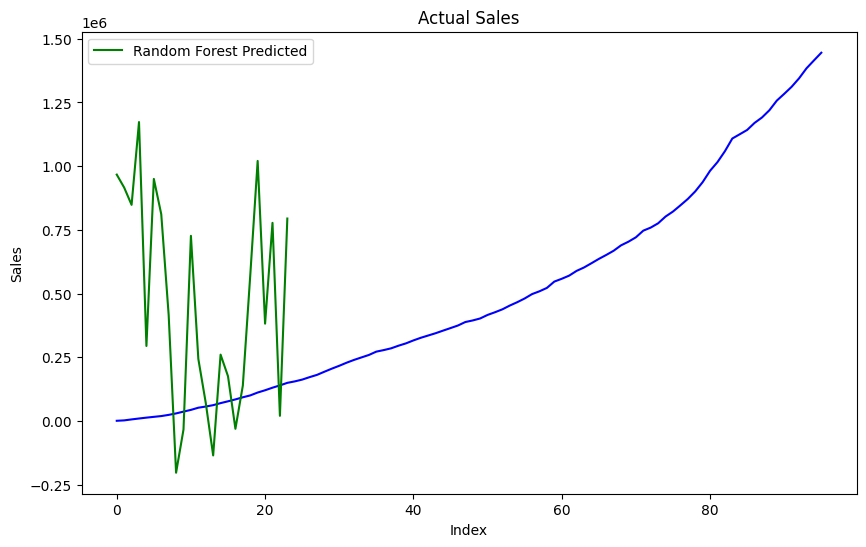

In [13]:
plt.figure(figsize=(10, 6))

# Plotting actual data
plt.plot(range(len(df)), y, color='blue')

# Plotting predicted data
plt.plot(range(len(y_test)), y_pred, color='green', label='Random Forest Predicted')

plt.title('Actual Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [14]:
# new_data = {'Month': [5], 'Day': [1], 'Year': [2012]}  #new data
# new_df = pd.DataFrame(new_data)
# prediction = model.predict(new_df)
# print("Predicted sales:", prediction)

In [15]:
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.9364744434174251


In [16]:
threshold = 0.1  # 10% error tolerance
percentage_errors = abs((y_test - y_pred) / y_test)

# number of predictions within the threshold
accurate_predictions = (percentage_errors <= threshold).sum()


In [17]:
accuracy = accurate_predictions / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.25


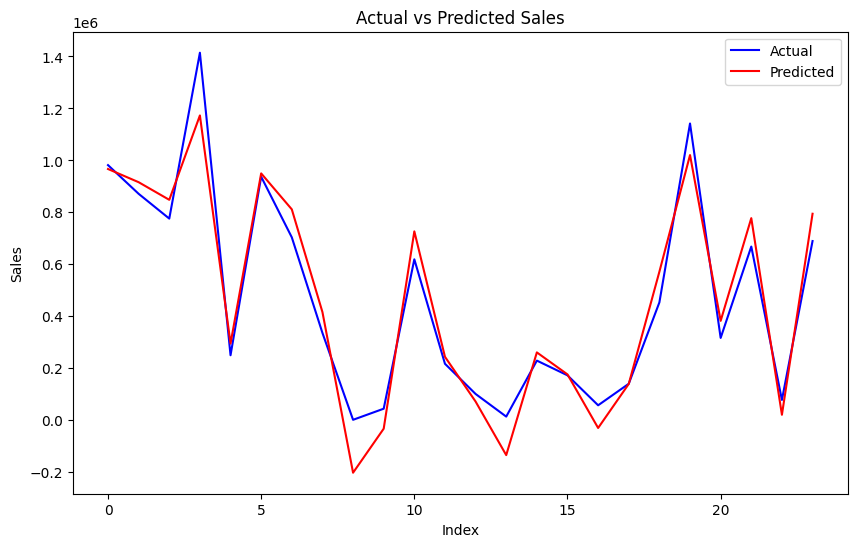

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting actual data
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual')

# Plotting predicted data
plt.plot(range(len(y_test)), y_pred, color='red', label='Predicted')

plt.title('Actual vs Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [1]:
y_test

NameError: name 'y_test' is not defined

# Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [20]:
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [96]:
print("Index\tActual\tPredicted")
for index, (actual, predicted) in enumerate(zip(y_test, rf_y_pred)):
    print(f"{index}\t{actual}\t{predicted}")

Index	Actual	Predicted
0	759090	992114.63
1	775935	855853.92
2	802378	779607.38
3	822001	1389947.5
4	846308	244698.59
5	871337	930172.84
6	900935	714863.54
7	937282	334221.45
8	981826	4891.44
9	1015900	40659.88
10	1058488	612301.84
11	1108388	207153.16
12	1125103	97163.1
13	1141994	11840.58
14	1169633	226776.66
15	1190888	167889.31
16	1219275	69368.14
17	1257092	134859.72
18	1283662	444721.21
19	1311327	1144867.25
20	1344455	308360.34
21	1383630	654161.72
22	1414527	75649.19
23	1444943	666734.18


In [21]:
import numpy as np

# Iterate over each data point in the test set
for i in range(len(X_test)):
    # Get the features for the current data point
    features = X_test.iloc[i]
    
    # Reshape the features array to match the model's input shape
    features_reshaped = np.array(features).reshape(1, -1)

    # Predict the sales using the trained Random Forest model
    y_pred_rf = rf_model.predict(features_reshaped)
    
    # Print the actual value and the predicted values for both models
    print(f"Actual: {y_test.iloc[i]}, Random Forest Predicted: {y_pred_rf}")


Actual: 981826, Random Forest Predicted: [992114.63]
Actual: 871337, Random Forest Predicted: [855853.92]
Actual: 775935, Random Forest Predicted: [779607.38]
Actual: 1414527, Random Forest Predicted: [1389947.5]
Actual: 249868, Random Forest Predicted: [244698.59]
Actual: 937282, Random Forest Predicted: [930172.84]
Actual: 703806, Random Forest Predicted: [714863.54]
Actual: 335850, Random Forest Predicted: [334221.45]
Actual: 1317, Random Forest Predicted: [4891.44]
Actual: 44053, Random Forest Predicted: [40659.88]
Actual: 619149, Random Forest Predicted: [612301.84]
Actual: 217036, Random Forest Predicted: [207153.16]
Actual: 100846, Random Forest Predicted: [97163.1]
Actual: 13630, Random Forest Predicted: [11840.58]
Actual: 229208, Random Forest Predicted: [226776.66]
Actual: 172474, Random Forest Predicted: [167889.31]
Actual: 57184, Random Forest Predicted: [69368.14]
Actual: 140104, Random Forest Predicted: [134859.72]
Actual: 453353, Random Forest Predicted: [444721.21]
Actu

C:\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegress

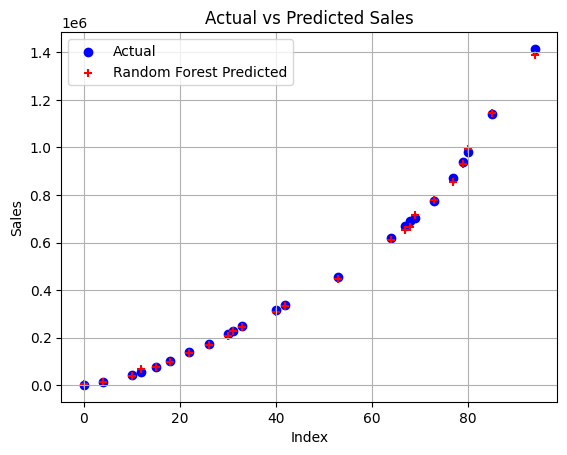

In [22]:
import matplotlib.pyplot as plt

# Get the indices of the test set to maintain the original order
indices = X_test.index

y_pred_rf_array = rf_model.predict(X_test)


# Plotting actual vs predicted for Random Forest
plt.scatter (indices, y_test, label='Actual', color='blue', marker='o')
plt.scatter(indices, y_pred_rf_array, label='Random Forest Predicted', color='red', marker='+')

plt.title('Actual vs Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


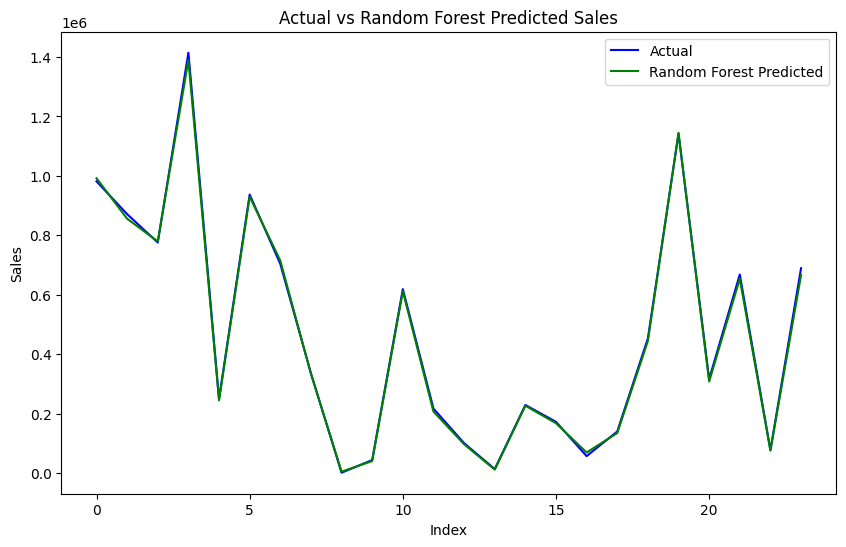

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting actual data
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual')

# Plotting predicted data
plt.plot(range(len(y_test)), rf_y_pred, color='green', label='Random Forest Predicted')

plt.title('Actual vs Random Forest Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [24]:
rf_mse = mean_squared_error(y_test, rf_y_pred)
print("Random Forest Mean Squared Error:", rf_mse)

rf_r2 = r2_score(y_test, rf_y_pred)
print("Random Forest R-squared score:", rf_r2)

Random Forest Mean Squared Error: 101002164.91124575
Random Forest R-squared score: 0.9993488028698665


In [98]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, rf_y_pred)
print("MAPE:", mape)


MAPE: 0.6214553012732836


In [25]:
threshold = 0.1  # 10% error tolerance

# Calculate the percentage error for each prediction
percentage_errors = abs((y_test - rf_y_pred) / y_test)
accurate_predictions = (percentage_errors <= threshold).sum()

In [26]:
accuracy = accurate_predictions / len(y_test)
print("Accuracy Random Forest:", accuracy)

Accuracy Random Forest: 0.875


In [27]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=50)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
dt_y_pred = dt_model.predict(X_test)

# Calculate Mean Squared Error
dt_mse = mean_squared_error(y_test, dt_y_pred)
print("Decision Tree Mean Squared Error:", dt_mse)

# Calculate R-squared score
dt_r2 = r2_score(y_test, dt_y_pred)
print("Decision Tree R-squared score:", dt_r2)


Decision Tree Mean Squared Error: 335159678.6666667
Decision Tree R-squared score: 0.9978391055174313


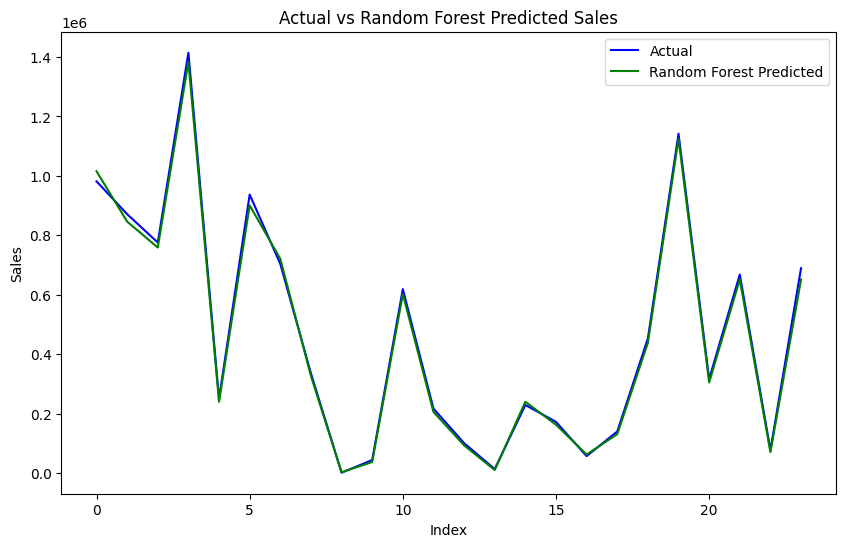

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting actual data
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual')

# Plotting predicted data
plt.plot(range(len(y_test)), dt_y_pred, color='green', label='Random Forest Predicted')

plt.title('Actual vs Random Forest Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [29]:
threshold = 0.1  # 10% error tolerance

# Calculate the percentage error for each prediction
percentage_errors_dt = abs((y_test - dt_y_pred) / y_test)

# Count the number of predictions within the threshold
accurate_predictions_dt = (percentage_errors_dt <= threshold).sum()

# Calculate the accuracy
accuracy_dt = accurate_predictions_dt / len(y_test)
print("Decision Tree Accuracy:", accuracy_dt*100)


Decision Tree Accuracy: 87.5


# Gradient Boosting Resgressor

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
gb_y_pred = gb_model.predict(X_test)

# Calculate Mean Squared Error
gb_mse = mean_squared_error(y_test, gb_y_pred)
print("Gradient Boosting Mean Squared Error:", gb_mse)

# Calculate R-squared score
gb_r2 = r2_score(y_test, gb_y_pred)
print("Gradient Boosting R-squared score:", gb_r2)


Gradient Boosting Mean Squared Error: 240735466.73928702
Gradient Boosting R-squared score: 0.9984478922288474


In [31]:
# Define a threshold for error tolerance
threshold = 0.1  # 10% error tolerance

# Calculate the percentage error for each prediction
percentage_errors_gb = abs((y_test - gb_y_pred) / y_test)

# Count the number of predictions within the threshold
accurate_predictions_gb = (percentage_errors_gb <= threshold).sum()

# Calculate the accuracy
accuracy_gb = accurate_predictions_gb / len(y_test)
print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.9166666666666666


In [32]:
from sklearn.svm import SVR

# Create an SVR model
svm_model = SVR()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
svm_y_pred = svm_model.predict(X_test)

# Calculate Mean Squared Error
svm_mse = mean_squared_error(y_test, svm_y_pred)
print("SVR Mean Squared Error:", svm_mse)

# Calculate R-squared score
svm_r2 = r2_score(y_test, svm_y_pred)
print("SVR R-squared score:", svm_r2)


SVR Mean Squared Error: 159786994577.74738
SVR R-squared score: -0.030203980212933024


In [33]:
# Define a threshold for error tolerance
threshold = 0.1  # 10% error tolerance

# Calculate the percentage error for each prediction
percentage_errors_svm = abs((y_test - svm_y_pred) / y_test)

# Count the number of predictions within the threshold
accurate_predictions_svm = (percentage_errors_svm <= threshold).sum()

# Calculate the accuracy
accuracy_svm = accurate_predictions_svm / len(y_test)
print("SVR Accuracy:", accuracy_svm)


SVR Accuracy: 0.0


In [34]:
from sklearn.ensemble import AdaBoostRegressor

# Create an AdaBoost Regression model
adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions
adaboost_y_pred = adaboost_model.predict(X_test)

# Calculate Mean Squared Error
adaboost_mse = mean_squared_error(y_test, adaboost_y_pred)
print("AdaBoost Mean Squared Error:", adaboost_mse)

# Calculate R-squared score
adaboost_r2 = r2_score(y_test, adaboost_y_pred)
print("AdaBoost R-squared score:", adaboost_r2)



AdaBoost Mean Squared Error: 1046987970.7181767
AdaBoost R-squared score: 0.9932496935841414


In [35]:
# Define a threshold for error tolerance
threshold = 0.1  # 10% error tolerance

# Calculate the percentage error for each prediction for AdaBoostRegressor
percentage_errors_adaboost = abs((y_test - adaboost_y_pred) / y_test)

# Count the number of predictions within the threshold for AdaBoostRegressor
accurate_predictions_adaboost = (percentage_errors_adaboost <= threshold).sum()

# Calculate the accuracy for AdaBoostRegressor
accuracy_adaboost = accurate_predictions_adaboost / len(y_test)
print("AdaBoost Accuracy:", accuracy_adaboost)

AdaBoost Accuracy: 0.5833333333333334


In [36]:
pip install xgboost

In [37]:
from xgboost import XGBRegressor

# Create an XGBoost Regression model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_y_pred = xgb_model.predict(X_test)

# Calculate Mean Squared Error
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
print("XGBoost Mean Squared Error:", xgb_mse)

# Calculate R-squared score
xgb_r2 = r2_score(y_test, xgb_y_pred)
print("XGBoost R-squared score:", xgb_r2)


XGBoost Mean Squared Error: 644033569.8392478
XGBoost R-squared score: 0.9958476849208381


In [38]:
percentage_errors_xgb = abs((y_test - xgb_y_pred) / y_test)

# Count the number of predictions within the threshold for XGBRegressor
accurate_predictions_xgb = (percentage_errors_xgb <= threshold).sum()

# Calculate the accuracy for XGBRegressor
accuracy_xgb = accurate_predictions_xgb / len(y_test)
print("XGBoost Accuracy:", accuracy_xgb)

XGBoost Accuracy: 0.9166666666666666


In [39]:
from sklearn.neural_network import MLPRegressor

# Create an MLP Regression model with increased max_iter
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42, max_iter=1000)

# Suppress convergence warning
import warnings

# Filter warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Create an MLP Regression model with increased max_iter
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42, max_iter=1000)

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions
mlp_y_pred = mlp_model.predict(X_test)

# Calculate Mean Squared Error
mlp_mse = mean_squared_error(y_test, mlp_y_pred)
print("MLP Mean Squared Error:", mlp_mse)

# Calculate R-squared score
mlp_r2 = r2_score(y_test, mlp_y_pred)
print("MLP R-squared score:", mlp_r2)



MLP Mean Squared Error: 155852660829.6527
MLP R-squared score: -0.00483792149530049


In [40]:
# Define a threshold for error tolerance
threshold = 0.1  # 10% error tolerance

# Calculate the percentage error for each prediction for MLPRegressor
percentage_errors_mlp = abs((y_test - mlp_y_pred) / y_test)

# Count the number of predictions within the threshold for MLPRegressor
accurate_predictions_mlp = (percentage_errors_mlp <= threshold).sum()

# Calculate the accuracy for MLPRegressor
accuracy_mlp = accurate_predictions_mlp / len(y_test)
print("MLP Accuracy:", accuracy_mlp)

MLP Accuracy: 0.0


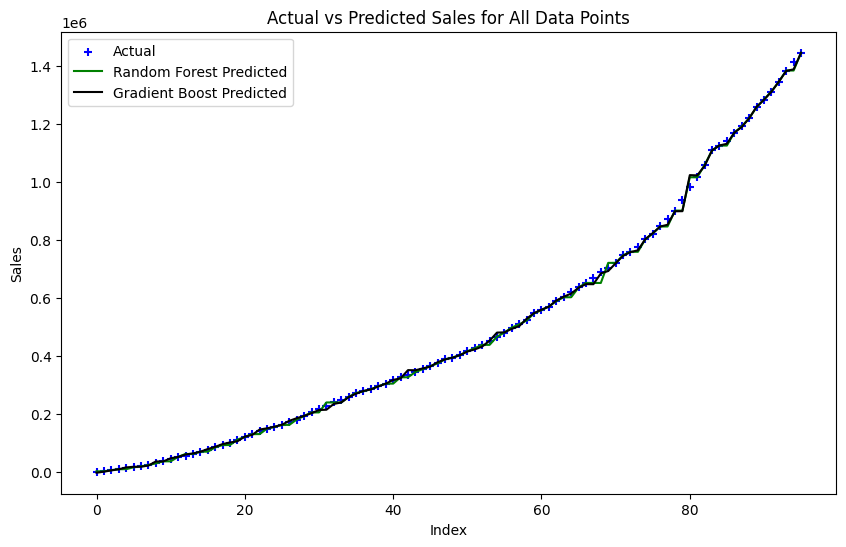

In [43]:
ar_all_pred = model.predict(df[['Month', 'Day', 'Year']])
bf_all_pred = dt_model.predict(df[['Month', 'Day', 'Year']])
cf_all_pred = mlp_model.predict(df[['Month', 'Day', 'Year']])
df_all_pred = gb_model.predict(df[['Month', 'Day', 'Year']])
ef_all_pred = adaboost_model.predict(df[['Month', 'Day', 'Year']])
ff_all_pred = svm_model.predict(df[['Month', 'Day', 'Year']])

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Sales'], color='blue', label='Actual',marker='+')
plt.plot(df.index, bf_all_pred, color='green', label='Random Forest Predicted')
plt.plot(df.index, df_all_pred, color='black', label='Gradient Boost Predicted')

plt.title('Actual vs Predicted Sales for All Data Points')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

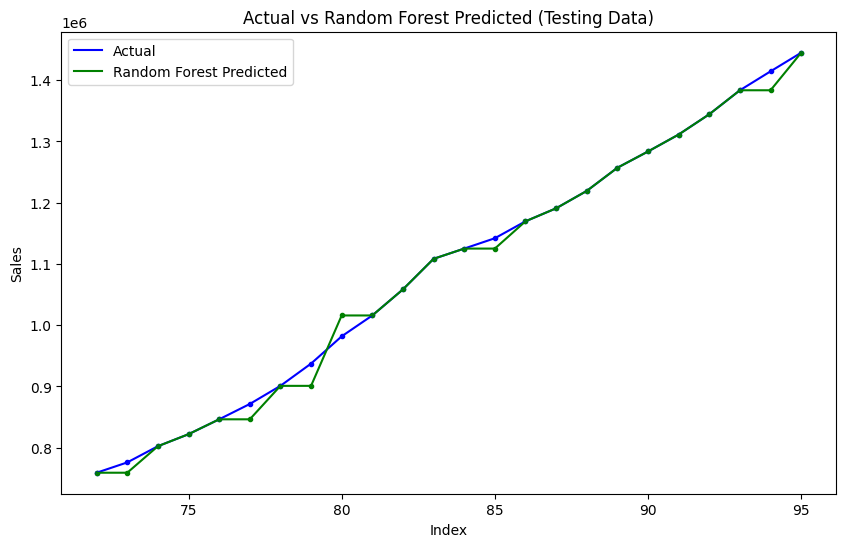

In [91]:
ar_test_pred = model.predict(X_test)
bf_test_pred = dt_model.predict(X_test)
cf_test_pred = mlp_model.predict(X_test)
df_test_pred = gb_model.predict(X_test)
ef_test_pred = adaboost_model.predict(X_test)
ff_test_pred = svm_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, color='blue', label='Actual')
plt.scatter(X_test.index, y_test, color='blue', marker='.')
plt.plot(X_test.index, bf_test_pred, color='green', label='Random Forest Predicted')
plt.scatter(X_test.index, bf_test_pred, color='green', marker='.')

plt.title('Actual vs Random Forest Predicted (Testing Data)')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()


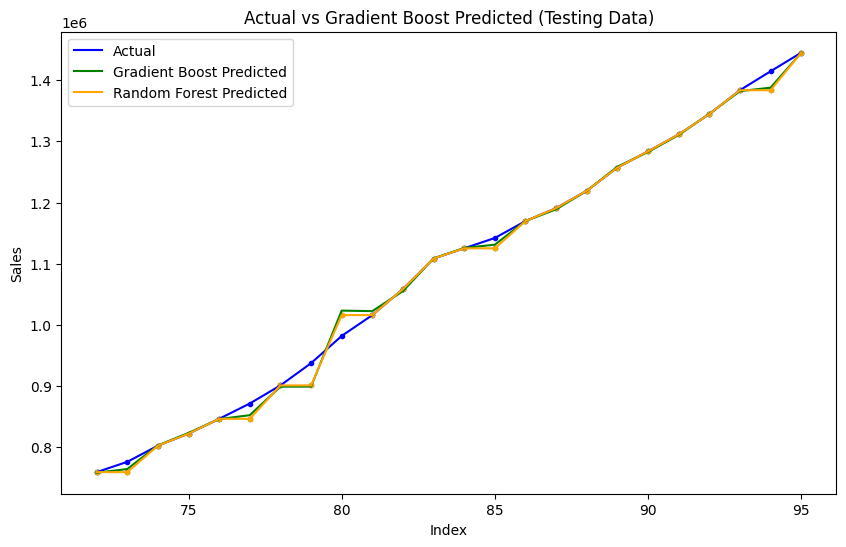

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, color='blue', label='Actual')
plt.scatter(X_test.index, y_test, color='blue', marker='.')
plt.plot(X_test.index, df_test_pred, color='green', label='Gradient Boost Predicted')
plt.scatter(X_test.index, bf_test_pred, color='green', marker='.')
plt.plot(X_test.index, bf_test_pred, color='orange', label='Random Forest Predicted')
plt.scatter(X_test.index, bf_test_pred, color='orange', marker='.')

plt.title('Actual vs Gradient Boost Predicted (Testing Data)')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()
